
#### Question3
3.1 How many total records are there?


100480507

In [32]:
files = ["combined_data_1.txt", "combined_data_2.txt", "combined_data_3.txt", "combined_data_4.txt"]


def count(txtfile):
  lines = open(txtfile)
  number_records = 0

  for line in lines:
    if ":" in line:
      continue
    else:
      number_records += 1
  print(number_records)
  return number_records

sum = 0
for txtfile in files:
  sum += count(txtfile)
print(sum)


24053764
26977591
22601629
26847523
100480507


3.2 Can you plot the distribution of star ratings over users and time? The granularity of the sliding window is at your discretion. Are there any trends?


As we can tell from the graph below, we get more and more ratings as years go by.

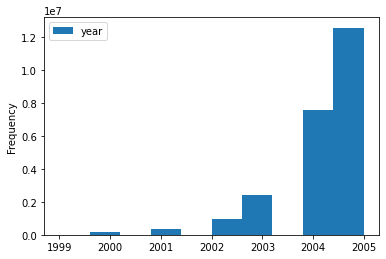

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#CustomerID,Rating,Date
df = pd.read_csv('combined_data_1.txt', delimiter = ",",names=['customerId', 'rating', 'date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df.plot(kind = 'hist', x = 'rating', y = 'year')

3.3 What percentage of the films have gotten more popular over time?


75.0%

In [34]:
lines = open("combined_data_1.txt")
num = 0

movie_dates = dict()
movie_ratings = dict()

for line in lines:
  # New movie
  if ":" in line:
    movie_key = int(line.split(":")[0])
    movie_dates[movie_key] = []
    movie_ratings[movie_key] = []
    continue
  # Parse the line
  else:
    items = line.split(",")
    movie_dates[movie_key].append( items[2][:-1] )
    movie_ratings[movie_key].append( int(items[1]) )
    num += 1

popular_or_not = 0

for movie_key in movie_dates:
  movie_date_list = movie_dates[movie_key]
  movie_last =  movie_date_list.index(max(movie_date_list))
  movie_first = movie_date_list.index(min(movie_date_list))
  popular_or_not += int((movie_ratings[movie_key][movie_last] - 
                         movie_ratings[movie_key][movie_first]) >= 0)

print(popular_or_not)
len(movie_dates.keys())

print(popular_or_not/len(movie_dates.keys()))

3373
0.7497221604801066


3.4 How many films have been re-released? How do you know?


None of them. Because every movie has a unique id.

In [25]:
movie_set = set()

files = ["combined_data_1.txt", "combined_data_2.txt", "combined_data_3.txt", "combined_data_4.txt"]

count = 0

for txtfile in files:
  lines = open(txtfile)
  for line in lines:
    if ":" in line:
      movie_set.add(line)
      count += 1

print(count - len(movie_set))



0


3.5 What other information might we try to extract to better understand the data? For the questions that you may come up with (especially any time series data), make sure you back up your assertions with plots. Go ahead and play around with the data, and explore.


From the histograph I made below, it looks like the number of users and the number of rating is in a opposite relationship. While one variable increase the other variable decrease and vice versa.

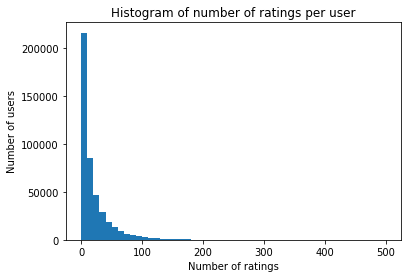

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the combined data file
ratings_df = pd.read_csv('combined_data_1.txt', names=['userId', 'rating', 'timestamp'])
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'])
ratings_df['year'] = ratings_df['timestamp'].dt.year

# Group the data by userId and year to get the number of ratings for each user and for each time window
num_ratings_df = ratings_df.groupby(['userId','year']).size().reset_index(name='num_ratings')

# Create a histogram of the number of ratings for each user
plt.hist(num_ratings_df.groupby('userId').sum()['num_ratings'], bins=50, range=[0, 500])
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.title('Histogram of number of ratings per user')
plt.show()

3.6 What are some interesting problems that we might solve? (No need to actually solve them!)

For each user, we might be able to generate a personal movie record. It contains how many movies they have watched in past 1 month/year, the average of their ratings, and their favorite top 5 movies.